<a href="https://colab.research.google.com/github/Gcango/Projecto_Limpeza_dados_datascience/blob/main/Limpeza_dados_dataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Num desafio feito com a luz da formação de LS, foi dispensado um dataset para ser aplicado ao projecto de Data Science. Entretanto este dataset apresenotu diversas anuances até se tornar apropriado para o projecto. As questões levantadas exercicio têm por objectivo tornar os dados de uma escola refinidos para utilizar no projecto d e data science.

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stt

In [2]:
##configurar o Pandas para exibir todas as linhas e colunas sem truncar (display.max_rows)
pd.set_option('display.max_rows',None)#Não ocultar nenhuma linha
pd.set_option('display.max_columns',10) #Não ocultar nenhuma coluna

#Inativar os alertas
pd.options.mode.chained_assignment = None

dados = pd.read_csv('dados.csv', encoding='latin1',sep=';',header=2)

plt.style.use('ggplot')

In [3]:
print(f"A base de dados da escola LS possui {dados.shape[0]} Linhas e {dados.shape[1]} Colunas")

A base de dados da escola LS possui 1273 Linhas e 10 Colunas


In [4]:
dados.head()

,Id,Nome,Idade,Nota,Genero,Altura (cm),Peso (kg),Cidade,Estado,Curso
0,1,Abigail,65,,F,300,,XMF,RJ,Química
1,2,Acácia,?,3,F,181,71,ALY,PR,Biologia
2,3,NaN,27,4,M,,?,,SP,Matemática
3,4,Adelaide,25,,F,174,?,DBE,RS,Química
4,5,NaN,NaN,8,F,?,87,QTT,PR,Física


In [5]:
dados.tail()

,Id,Nome,Idade,Nota,Genero,Altura (cm),Peso (kg),Cidade,Estado,Curso
1268,1249,Eduardo,36,0,F,150,92,LTI,MG,Matemática
1269,1250,Michele,68,7,F,421,101,YDR,PR,História
1270,1251,Fatima,40,7,M,141,71,EWW,RJ,Física
1271,1252,Anaelton,69,10,M,184,79,FFE,RJ,História
1272,Subtotal,27/09/2023,NaN,NaN,V=10,OBS=1240,Fim de página,NaN,NaN,fim page


In [6]:
#Exclui a última linha do DataSet da ESCOLA
dados = dados.iloc[:-1]
dados.tail()

,Id,Nome,Idade,Nota,Genero,Altura (cm),Peso (kg),Cidade,Estado,Curso
1267,1248,Fabio,75,0,F,104,108,KEP,PR,Física
1268,1249,Eduardo,36,0,F,150,92,LTI,MG,Matemática
1269,1250,Michele,68,7,F,421,101,YDR,PR,História
1270,1251,Fatima,40,7,M,141,71,EWW,RJ,Física
1271,1252,Anaelton,69,10,M,184,79,FFE,RJ,História


In [ ]:
#verificação das variaveis

In [7]:
dados.columns

Index(['Id', 'Nome', 'Idade', 'Nota', 'Genero', 'Altura (cm)', 'Peso (kg)',
       'Cidade', 'Estado', 'Curso'],
      dtype='object')

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1272 non-null   object
 1   Nome         1259 non-null   object
 2   Idade        1254 non-null   object
 3   Nota         1272 non-null   object
 4   Genero       1272 non-null   object
 5   Altura (cm)  1272 non-null   object
 6   Peso (kg)    1272 non-null   object
 7   Cidade       1268 non-null   object
 8   Estado       1265 non-null   object
 9   Curso        1270 non-null   object
dtypes: object(10)
memory usage: 99.5+ KB


In [9]:
dados.dtypes

Id             object
Nome           object
Idade          object
Nota           object
Genero         object
Altura (cm)    object
Peso (kg)      object
Cidade         object
Estado         object
Curso          object
dtype: object

In [ ]:
#Convertendo os dados de objecto para o numericos

In [10]:
dados['Idade'] = pd.to_numeric(dados['Idade'], errors='coerce')
dados['Nota'] = pd.to_numeric(dados['Nota'], errors='coerce')
dados['Altura (cm)'] = pd.to_numeric(dados['Altura (cm)'], errors='coerce')
dados['Peso (kg)'] = pd.to_numeric(dados['Peso (kg)'], errors='coerce')

In [11]:
dados.dtypes

Id              object
Nome            object
Idade          float64
Nota           float64
Genero          object
Altura (cm)    float64
Peso (kg)      float64
Cidade          object
Estado          object
Curso           object
dtype: object

In [12]:
dados.describe()

,Idade,Nota,Altura (cm),Peso (kg)
count,1249.000000,1245.000000,1254.000000,1253.000000
mean,48.136109,4.922088,155.073365,83.872306
std,17.955225,3.160936,46.086903,23.130370
min,18.000000,0.000000,100.000000,45.000000
25%,33.000000,2.000000,126.000000,63.000000
50%,48.000000,5.000000,150.000000,83.000000
75%,64.000000,8.000000,178.000000,104.000000
max,78.000000,10.000000,512.000000,125.000000


In [ ]:
#Verificar dados nulos e oseu impacto no dataset

In [13]:
dados.isna().sum()

Id              0
Nome           13
Idade          23
Nota           27
Genero          0
Altura (cm)    18
Peso (kg)      19
Cidade          4
Estado          7
Curso           2
dtype: int64

In [15]:
percentagem = dados.isna().sum()/len(dados['Id']*100)
percentagem = round(percentagem, 3)
percentagem

Id             0.000
Nome           0.010
Idade          0.018
Nota           0.021
Genero         0.000
Altura (cm)    0.014
Peso (kg)      0.015
Cidade         0.003
Estado         0.006
Curso          0.002
dtype: float64

In [ ]:
#Verificar dos dados duplicados

In [16]:
duplicados = dados[dados.duplicated()]
duplicados

,Id,Nome,Idade,Nota,Genero,Altura (cm),Peso (kg),Cidade,Estado,Curso
1252,1233,Jonas,24.0,5.0,?,200.0,73.0,ZHF,PR,Matemática
1253,1234,Sidnei,22.0,10.0,M,346.0,51.0,EJT,,Química
1254,1235,Eustáquio,71.0,7.0,M,139.0,100.0,,MG,História
1255,1236,Benedito,25.0,10.0,?,NaN,98.0,,?,Matemática
1256,1237,Rafael,36.0,6.0,F,172.0,NaN,ZNH,RJ,Química
1257,1238,Nicole,46.0,NaN,F,412.0,92.0,AHT,?,História
1258,1239,Victoria,72.0,NaN,M,151.0,NaN,MPS,RJ,Física
1259,1240,Julia,60.0,NaN,M,500.0,NaN,HRT,MG,História
1260,1241,Patricia,76.0,10.0,M,110.0,48.0,QKL,SP,Química
1261,1242,Eder,35.0,8.0,F,150.0,82.0,HLC,PR,Matemática


In [17]:
dupl_qtd = dados.duplicated().sum()
dupl_qtd

20

In [50]:
dados.drop_duplicates(inplace=True)

In [51]:
dupl_qtd = dados.duplicated().sum()
dupl_qtd

0

In [ ]:
#Verificar dados com caracteres inapropriados

In [18]:
dados_inap = dados.applymap(lambda x: x=='?').sum()
dados_inap

Id              0
Nome            0
Idade           0
Nota            0
Genero          4
Altura (cm)     0
Peso (kg)       0
Cidade         11
Estado         12
Curso           1
dtype: int64

In [20]:
dados.head()

,Id,Nome,Idade,Nota,Genero,Altura (cm),Peso (kg),Cidade,Estado,Curso
0,1,Abigail,65.0,NaN,F,300.0,NaN,XMF,RJ,Química
1,2,Acácia,NaN,3.0,F,181.0,71.0,ALY,PR,Biologia
2,3,NaN,27.0,4.0,M,NaN,NaN,,SP,Matemática
3,4,Adelaide,25.0,NaN,F,174.0,NaN,DBE,RS,Química
4,5,NaN,NaN,8.0,F,NaN,87.0,QTT,PR,Física


In [ ]:
#Excluir as colunas não necessárias para o projecto de Data_Science

In [21]:
dados.drop('Id', axis=1, inplace=True)

In [22]:
dados.head(3)

,Nome,Idade,Nota,Genero,Altura (cm),Peso (kg),Cidade,Estado,Curso
0,Abigail,65.0,NaN,F,300.0,NaN,XMF,RJ,Química
1,Acácia,NaN,3.0,F,181.0,71.0,ALY,PR,Biologia
2,NaN,27.0,4.0,M,NaN,NaN,,SP,Matemática


In [ ]:
#Subistituir os valoes inapropriados do dataset por NaN

In [26]:
dados.replace('?', None, inplace=True)
dados_inap_2 = dados.applymap(lambda x: x=='?').sum()
dados_inap_2

Nome           0
Idade          0
Nota           0
Genero         0
Altura (cm)    0
Peso (kg)      0
Cidade         0
Estado         0
Curso          0
dtype: int64

In [27]:
dados.head()

,Nome,Idade,Nota,Genero,Altura (cm),Peso (kg),Cidade,Estado,Curso
0,Abigail,65.0,NaN,F,300.0,NaN,XMF,RJ,Química
1,Acácia,NaN,3.0,F,181.0,71.0,ALY,PR,Biologia
2,NaN,27.0,4.0,M,NaN,NaN,,SP,Matemática
3,Adelaide,25.0,NaN,F,174.0,NaN,DBE,RS,Química
4,NaN,NaN,8.0,F,NaN,87.0,QTT,PR,Física


In [ ]:
#Verificar Quantidade e impacto dos Valores nulos na coluna Nome

In [28]:
qtd_nomes = dados['Nome'].isna().sum()
qtd_nomes

13

In [32]:
perc_nulos = dados.isna().sum() / len(dados['Idade']*100)
perc_nulos = round(perc_nulos, 3)
perc_nulos

Nome           0.010
Idade          0.018
Nota           0.021
Genero         0.003
Altura (cm)    0.014
Peso (kg)      0.015
Cidade         0.012
Estado         0.015
Curso          0.002
dtype: float64

In [34]:
dados.dropna(subset=['Nome'], inplace=True)
qtd_nomes_nulos = dados['Nome'].isna().sum()
qtd_nomes_nulos

0

In [ ]:
#Verificar Quantidade de Nan e atribuir uma media a coluna idade

In [35]:
qtd_idade = dados['Idade'].isna().sum()
qtd_idade

21

In [38]:
media_idade = dados['Idade'].mean()
dados['Idade'] = dados['Idade'].fillna(media_idade)

In [ ]:
#Verificar Quantidade Nan e atribuir pela mediana da altura

In [109]:
qtd_nulos = dados['Altura (cm)'].isna().sum()
qtd_nulos

0

In [110]:
media_altura = dados['Altura (cm)'].mean()
dados['Altura (cm)']=dados['Altura (cm)'].fillna(media_altura)

In [ ]:
#Verificar Quantidade Nan e atribuir pela media do peso

In [77]:
qtd_peso = dados['Peso (kg)'].isna().sum()
qtd_peso

0

In [78]:
media_peso=dados['Peso (kg)'].mean()
dados['Peso (kg)']=dados['Peso (kg)'].fillna(media_peso)

In [79]:
#Verificar Quantidade Nan e atribuir pela media da variavel Nota

In [80]:
qtd_notas = dados['Nota'].isna().sum()
qtd_notas

0

In [81]:
media_nota = dados['Nota'].mean()
dados['Nota']=dados['Nota'].fillna(media_nota)

In [82]:
#Verificar e alterar os NaN das demais variaveis

In [83]:
dados['Cidade']=dados['Cidade'].fillna(dados['Estado'])
dados['Estado']=dados['Estado'].fillna(dados['Cidade'])
dados['Curso']=dados['Curso'].fillna('Outros')
dados[['Cidade', 'Estado', 'Curso']]=dados[['Cidade', 'Estado', 'Curso']].fillna("Outros")

In [84]:
#Verificar mais NaN

In [85]:
nulos_dados = dados.isna().sum() / len(dados['Idade'])*100
nulos_dados

Nome           0.0
Idade          0.0
Nota           0.0
Genero         0.0
Altura (cm)    0.0
Peso (kg)      0.0
Cidade         0.0
Estado         0.0
Curso          0.0
dtype: float64

In [86]:
#Verificar a Coluna Genero

In [87]:
dados['Genero'].unique()

array(['F', 'M', 51, 'NF'], dtype=object)

In [88]:
genero_nulos = dados['Genero'].isna().sum()
genero_nulos

0

In [89]:
dados['Genero']=dados['Genero'].fillna('NF')

In [90]:
dados['Genero'].value_counts()

M     644
F     592
NF      2
51      1
Name: Genero, dtype: int64

In [91]:
valores_nan = dados.isna().sum()/len(dados['Idade'])*100
valores_nan

Nome           0.0
Idade          0.0
Nota           0.0
Genero         0.0
Altura (cm)    0.0
Peso (kg)      0.0
Cidade         0.0
Estado         0.0
Curso          0.0
dtype: float64

In [92]:
dados.sample(10)

,Nome,Idade,Nota,Genero,Altura (cm),Peso (kg),Cidade,Estado,Curso
1002,Agustín Bonifácio,62.0,5.0,M,51,80.0,RUN,MG,História
1112,Antonia Bonifácio,75.0,1.0,F,51,117.0,EUW,RJ,História
310,Audrey,18.0,9.0,F,51,95.0,GIU,RS,Matemática
495,Amédée Santos,64.0,1.0,F,51,115.0,BKR,MG,Física
899,Anaïs Silva,56.0,4.0,F,51,117.0,MAW,SP,Química
79,Abraão,49.0,1.0,M,51,59.0,DQB,SP,Física
887,Arlette Silva,27.0,6.0,F,51,58.0,KMS,MG,Biologia
670,Audrey Albuquerque,36.0,1.0,M,51,64.0,ECY,MG,Química
977,Aldric Silva,43.0,6.0,F,51,111.0,PUM,RS,Química
462,Agathe Santos,29.0,6.0,M,51,50.0,CEG,MG,Física


In [93]:
#Exibindo a Variavel Genero

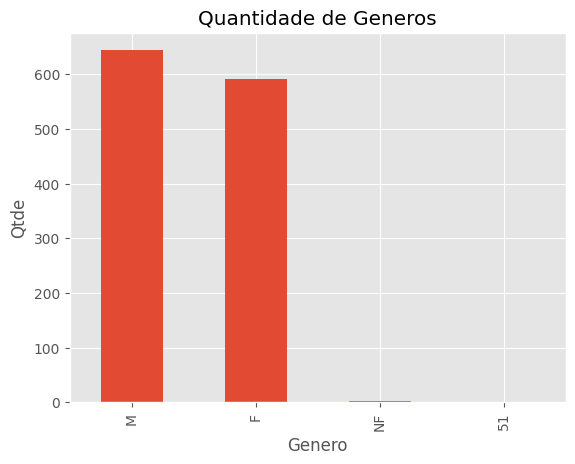

In [94]:
plt.title('Quantidade de Generos')
plt.xlabel('Genero')
plt.ylabel('Qtde')
_ = dados.Genero.value_counts().plot.bar()

In [95]:
#Quais cursos estão presente no dataset e a escola leciona?

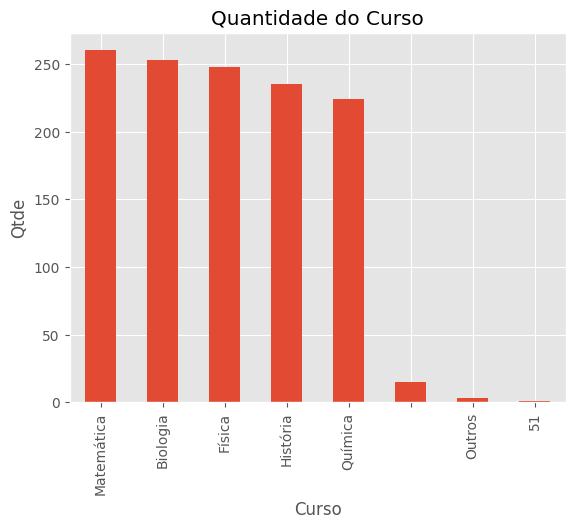

In [96]:
plt.title('Quantidade do Curso')
plt.xlabel('Curso')
plt.ylabel('Qtde')
_ = dados.Curso.value_counts().plot.bar()

In [97]:
#Verificar a Quantidade por curso
dados['Curso'].value_counts()

Matemática    260
Biologia      253
Física        248
História      235
Química       224
               15
Outros          3
51              1
Name: Curso, dtype: int64

In [98]:
#Quais os Estados pertencem os alunos incritos

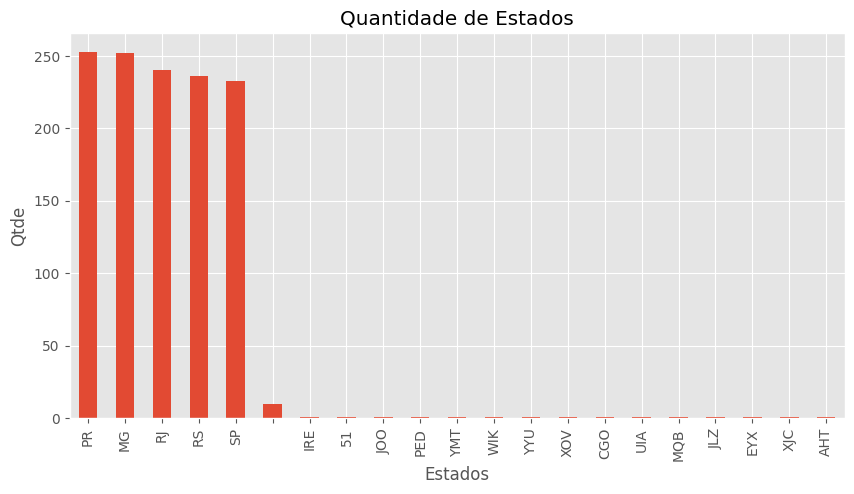

In [99]:
plt.figure(figsize=(10,5))
plt.title('Quantidade de Estados')
plt.xlabel('Estados')
plt.ylabel('Qtde')
_ = dados.Estado.value_counts().plot.bar()

In [ ]:
#Verificando a Idaded pelo Curso

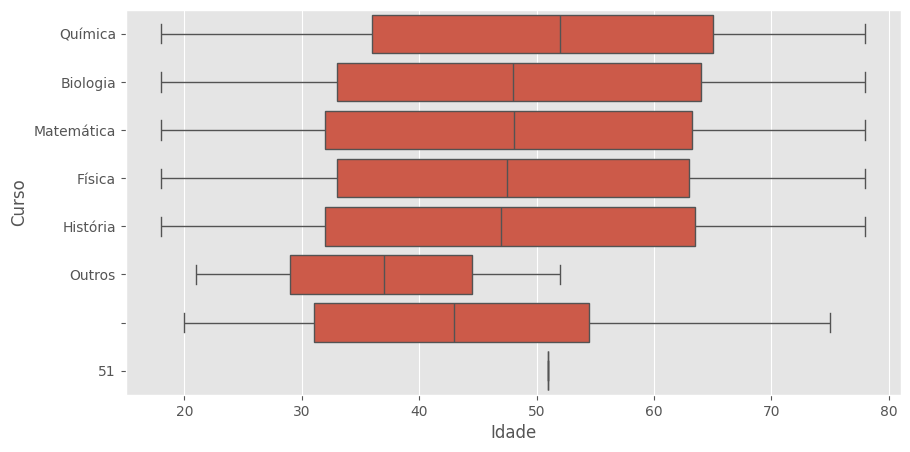

In [113]:
plt.figure(figsize=(10,5))
_ = sns.boxplot(x=dados['Idade'],y=dados['Curso'], data=dados)

In [101]:
#Verificando Alplitude Inquartil pela Idade

In [114]:
q1 = dados['Idade'].quantile(0.25)
q1

33.0

In [115]:
#Calculando Q3
q3 = dados['Idade'].quantile(0.75)
q3

64.0

In [116]:
#Amplitude interquartil (q3-q1)
IQR = q3 - q1
IQR

31.0

In [119]:
#Calculando limite inferior (q1-1.5)xIQR
limite_inferior = q1 - 1.5 *(IQR)
limite_inferior

-13.5

In [120]:
#Calculando limite superior  (q3 + 1.5)xIQR
limite_superior = q3 + 1.5 * (IQR)
limite_superior

110.5

In [121]:
#tratamento alicando filtro no DataFrame
#realizando os filtros no df sem os outliers é uma forma de remover eles
outliers = dados[(dados['Idade'] < limite_inferior) |(dados['Idade'] > limite_superior)]
outliers

,Nome,Idade,Nota,Genero,Altura (cm),Peso (kg),Cidade,Estado,Curso


In [122]:
#Aplicar filtros no df e identificar os outliers

dados = dados[(dados['Idade']>= limite_inferior) & (dados['Idade'] <= limite_superior)]

In [124]:
#qtdade de Outliers
qtdade_outliers = len(dados[(dados['Idade'] < limite_inferior) |(dados['Idade'] > limite_superior)])
qtdade_outliers

0

In [127]:
#Selecionar as variaveis numericas
variaveis_numericas = dados.select_dtypes(include=['int64','float64'])
variaveis_numericas.sample(10)

,Idade,Nota,Altura (cm),Peso (kg)
162,22.0,4.000000,51,99.0
36,66.0,4.908354,51,55.0
300,39.0,10.000000,51,74.0
409,40.0,9.000000,51,103.0
602,37.0,4.000000,51,90.0
973,76.0,3.000000,51,94.0
988,29.0,9.000000,51,113.0
267,53.0,0.000000,51,68.0
820,48.0,2.000000,51,88.0
1232,24.0,5.000000,51,73.0


In [128]:
#calcular o coeficiente de correlação de pearson
matriz_correlacao = variaveis_numericas.corr(method='pearson')
matriz_correlacao

,Idade,Nota,Altura (cm),Peso (kg)
Idade,1.000000,0.016188,NaN,0.004376
Nota,0.016188,1.000000,NaN,-0.046837
Altura (cm),NaN,NaN,NaN,NaN
Peso (kg),0.004376,-0.046837,NaN,1.000000


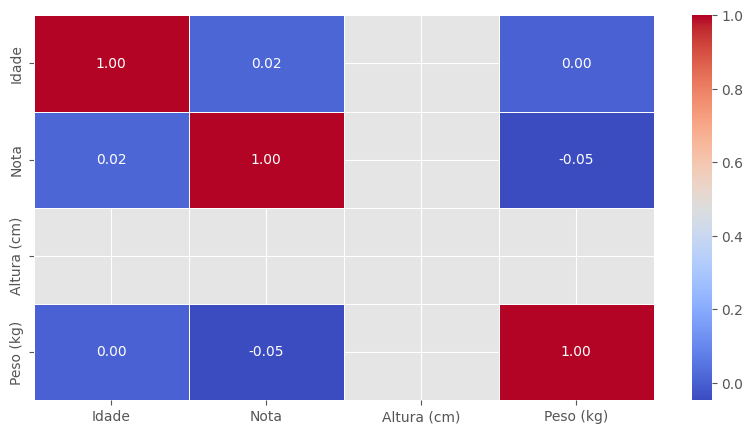

In [129]:
#outra forma de demostrar a correlaçao
plt.figure(figsize=(10,5))

sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f',linewidths=.5)
plt.show()